In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from spudtr import filters
from spudtr import get_demo_df, P3_1500_FEATHER

# Design a lowpass filter

lowpass filter
sampling rate (samples / s): 250.000
1/2 amplitude cutoff (Hz): 40.000
transition width (Hz): 10.000
ripple (dB): 53.000
window: kaiser
length (coefficients): 81
delay (samples): 40
edge distortion: first and last 0.1600 seconds of the data(= 40 samples at 250.0 samples / s)


/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:492: UserWarning: using default window='kaiser'
  warnings.warn(f"using default window='{window}'")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:504: UserWarning: using default width_hz=10.000
  warnings.warn(f"using default width_hz={width_hz:0.3f}")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:508: UserWarning: using default ripple_db=53.000
  warnings.warn(f"using default ripple_db={ripple_db:0.3f}")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:885: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, y, ".-", color="c", linestyle="-", label="input")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:886: UserWarning: linestyle is redun

(<Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 2 Axes>,
 0.16,
 40)

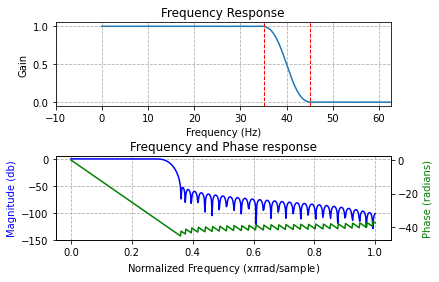

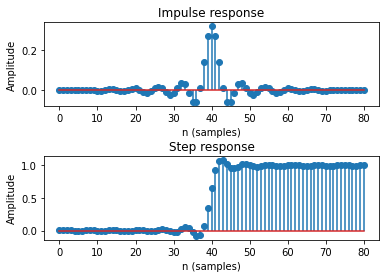

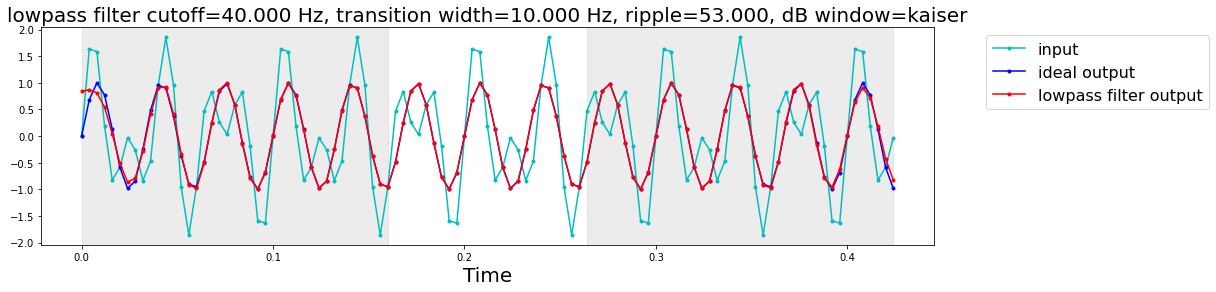

In [2]:
ftype = "lowpass"
cutoff_hz = 40.0  # 1/2 amplitude 
sfreq = 250.0

filters.show_filter(ftype=ftype, cutoff_hz=cutoff_hz, sfreq=sfreq);

# Design a bandpass filter

and use Python `**` trickery to expand the dictionary

/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:492: UserWarning: using default window='kaiser'
  warnings.warn(f"using default window='{window}'")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:504: UserWarning: using default width_hz=2.500
  warnings.warn(f"using default width_hz={width_hz:0.3f}")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:508: UserWarning: using default ripple_db=53.000
  warnings.warn(f"using default ripple_db={ripple_db:0.3f}")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:885: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, y, ".-", color="c", linestyle="-", label="input")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:886: UserWarning: linestyle is redund

bandpass filter
sampling rate (samples / s): 250.000
1/2 amplitude cutoff (Hz): 8.000 12.000
transition width (Hz): 2.500
ripple (dB): 53.000
window: kaiser
length (coefficients): 315
delay (samples): 157
edge distortion: first and last 0.6280 seconds of the data(= 157 samples at 250.0 samples / s)


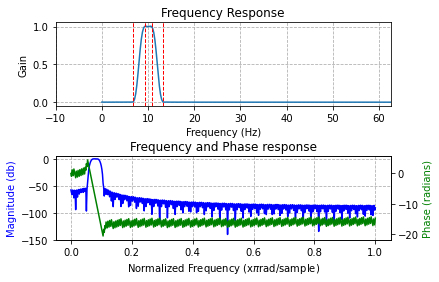

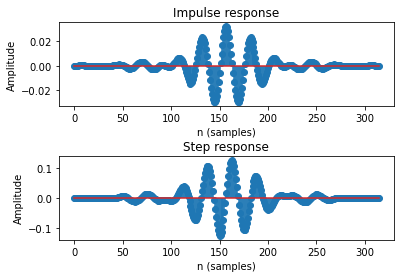

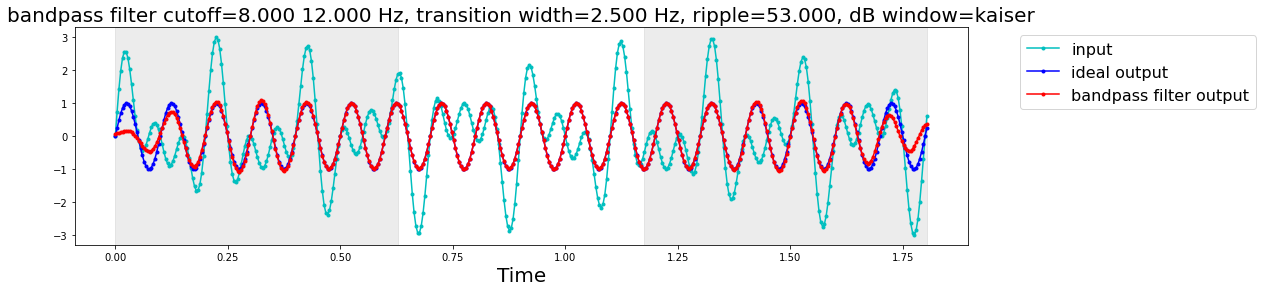

In [3]:
bp_filt = {
    "cutoff_hz": [8, 12],
    "sfreq": 250.0,
    "ftype": "bandpass",
}
f1, f2, s_edge, n_edge = filters.show_filter(**bp_filt)

**Look up reasonable default parameters for the bandpass**

In [4]:
bp_params = filters.check_filter_params(**bp_filt, allow_defaults=True)
bp_params

/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:492: UserWarning: using default window='kaiser'
  warnings.warn(f"using default window='{window}'")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:504: UserWarning: using default width_hz=2.500
  warnings.warn(f"using default width_hz={width_hz:0.3f}")
/home/runner/miniconda/envs/env_3.9/lib/python3.9/site-packages/spudtr/filters.py:508: UserWarning: using default ripple_db=53.000
  warnings.warn(f"using default ripple_db={ripple_db:0.3f}")


{'ftype': 'bandpass',
 'cutoff_hz': [8, 12],
 'width_hz': 2.5,
 'ripple_db': 53,
 'window': 'kaiser',
 'sfreq': 250.0}

**How to generate your own test sinewave data**

In [5]:
sines_specs = {
    "freq_list": [10, 25, 40],
    "amplitude_list": [1.0, 1.0, 1.0],
    "sampling_freq": 250,
}

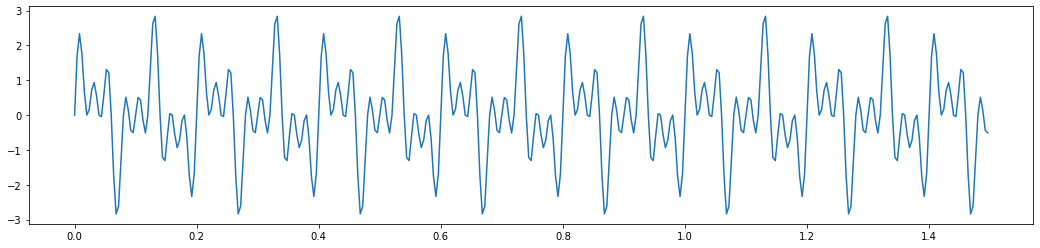

In [6]:
t, y = filters._sins_test_data(**sines_specs, show_plot=True)
sines_dt = np.array(y, dtype=np.dtype([("sines", float)]))

**You must apply the filter with ALL the parameters**

The partial specification with only `ftype`, `cutoff_hz`, and `sfreq` doesn't work ...

In [7]:
try:
    display(bp_filt)
    sines_dt_filt = filters.fir_filter_data(
    sines_dt,
    **bp_filt,
    )
except Exception as fail:
    print(type(fail), fail)

{'cutoff_hz': [8, 12], 'sfreq': 250.0, 'ftype': 'bandpass'}

<class 'ValueError'> window=None, must be one of kaiser hamming hann blackman


The complete parameter specification, in any order, works ...

In [8]:
display(bp_params)
sines_dt_filt = filters.fir_filter_data(
    sines_dt,
    **bp_params,
)

{'ftype': 'bandpass',
 'cutoff_hz': [8, 12],
 'width_hz': 2.5,
 'ripple_db': 53,
 'window': 'kaiser',
 'sfreq': 250.0}

**Plot before and after**

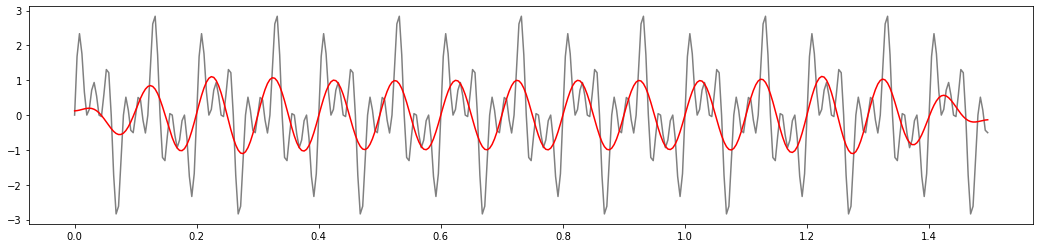

In [9]:
f, ax = plt.subplots(figsize=(18,4))
ax.plot(t, sines_dt, color='gray')
ax.plot(t, sines_dt_filt, color='red');